# Tratamento da base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import numpy as np
import datetime

In [3]:
base = pd.read_csv('petr4_treinamento_ex.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1340,2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
1341,2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
1342,2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.750000,19.650000,20.080000,20.080000,240343800.0


In [4]:
from datetime import datetime
# converter a coluna de data para formato de data 
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
# coluna date será o indice do dataframe
base = pd.read_csv('petr4_treinamento_ex.csv', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
base

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...
2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2013-01-02 to 2018-05-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1342 non-null   float64
 1   High       1342 non-null   float64
 2   Low        1342 non-null   float64
 3   Close      1342 non-null   float64
 4   Adj Close  1342 non-null   float64
 5   Volume     1342 non-null   float64
dtypes: float64(6)
memory usage: 73.6 KB


In [6]:
# será utilizado somente o valor Close (valor de fechamento)
base.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
base

,Close
Date,
2013-01-02,19.690001
2013-01-03,20.400000
2013-01-04,20.430000
2013-01-07,20.080000
2013-01-08,19.500000
...,...
2018-05-21,25.049999
2018-05-22,24.709999
2018-05-23,23.270000


In [7]:
base_teste = base.copy()
base_teste.shape

(1345, 1)

In [8]:
# irá contem -30 menos para que o modelo possa prever as 30 proximas datas
base_treinamento = base.iloc[0:1315,:]
base_treinamento

,Close
Date,
2013-01-02,19.690001
2013-01-03,20.400000
2013-01-04,20.430000
2013-01-07,20.080000
2013-01-08,19.500000
...,...
2018-04-06,21.280001
2018-04-09,20.530001
2018-04-10,21.400000


In [9]:
base_treinamento.index.min(), base_treinamento.index.max()

(Timestamp('2013-01-02 00:00:00'), Timestamp('2018-04-12 00:00:00'))

In [10]:
base_teste.index.min(), base_teste.index.max()

(Timestamp('2013-01-02 00:00:00'), Timestamp('2018-05-25 00:00:00'))

In [11]:
dt_data_inicial = pd.Timestamp("2013-01-02", freq = 'D')
dt_data_final_treinamento = pd.Timestamp("2018-12-04", freq = 'D')
dt_previsao_maxima = pd.Timestamp("2018-05-25", freq = 'D')

faixa_treinamento = (dt_data_inicial, dt_data_final_treinamento)
faixa_teste = (dt_data_inicial, dt_previsao_maxima)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
faixa_treinamento

(Timestamp('2013-01-02 00:00:00', freq='D'),
 Timestamp('2018-12-04 00:00:00', freq='D'))

In [13]:
faixa_teste

(Timestamp('2013-01-02 00:00:00', freq='D'),
 Timestamp('2018-05-25 00:00:00', freq='D'))

In [14]:
serie_temporal_treinamento = []
serie_temporal_teste = []

# Close é o target
serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[1]]['Close'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[1]]['Close'])

In [15]:
type(serie_temporal_treinamento), type(serie_temporal_teste)

(list, list)

In [16]:
serie_temporal_treinamento

[Date
 2013-01-02    19.690001
 2013-01-03    20.400000
 2013-01-04    20.430000
 2013-01-07    20.080000
 2013-01-08    19.500000
                 ...    
 2018-04-06    21.280001
 2018-04-09    20.530001
 2018-04-10    21.400000
 2018-04-11    21.799999
 2018-04-12    21.680000
 Name: Close, Length: 1315, dtype: float64]

In [17]:
serie_temporal_teste

[Date
 2013-01-02    19.690001
 2013-01-03    20.400000
 2013-01-04    20.430000
 2013-01-07    20.080000
 2013-01-08    19.500000
                 ...    
 2018-05-21    25.049999
 2018-05-22    24.709999
 2018-05-23    23.270000
 2018-05-24    20.080000
 2018-05-25    19.799999
 Name: Close, Length: 1345, dtype: float64]

In [18]:
len(serie_temporal_treinamento[0]), len(serie_temporal_teste[0])

(1315, 1345)

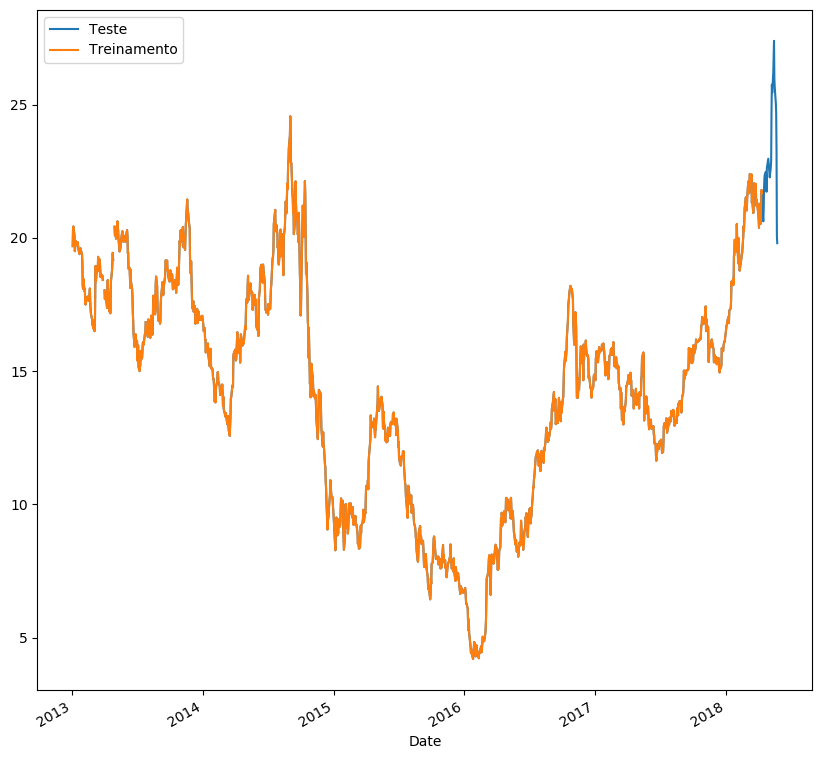

In [19]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label = "Teste")
serie_temporal_treinamento[0].plot(label = "Treinamento")
plt.legend()
plt.show()

In [20]:
# ajuste para os dados Nan
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [21]:
encode_target(serie_temporal_treinamento[0][0:5])

[19.690001, 20.4, 20.43, 20.08, 19.5]

In [22]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [23]:
series_to_obj(serie_temporal_treinamento[0][0:5])

{'start': '2013-01-02 00:00:00',
 'target': [19.690001, 20.4, 20.43, 20.08, 19.5]}

In [24]:
# conversão de serie para json
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [25]:
series_to_jsonline(serie_temporal_treinamento[0][0:5])

'{"start": "2013-01-02 00:00:00", "target": [19.690001, 20.4, 20.43, 20.08, 19.5]}'

In [26]:
encoding = 'utf-8'
arquivo_json_treinamento = 'train_petr.json'
arquivo_json_teste = 'test_petr.json'
with open(arquivo_json_treinamento, 'wb') as fp:
    for ts in serie_temporal_treinamento:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(arquivo_json_teste, 'wb') as fp:
    for ts in serie_temporal_teste:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

# Configurações do SageMaker

In [28]:
import boto3
import sagemaker

In [29]:
session = sagemaker.Session()
role = sagemaker.get_execution_role()
job_name = 'deepar-petr'
bucket = 'cursoawssagemakersp'
subpasta_dataset = 'datasets/petr'
subpasta_modelo = 'modelos/petr/deepar'
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, 'train_petr.json')
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset, 'test_petr.json')
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)

print('Role: {}'.format(role))
print('Localização da base de treinamento: {}'.format(s3_train_data))
print('Localização da base de teste: {}'.format(s3_test_data))
print('Modelo será salvo em: {}'.format(output_location))

Role: arn:aws:iam::605390214759:role/service-role/AmazonSageMaker-ExecutionRole-20230311T091643
Localização da base de treinamento: s3://cursoawssagemakersp/datasets/petr/train/train_petr.json
Localização da base de teste: s3://cursoawssagemakersp/datasets/petr/test/test_petr.json
Modelo será salvo em: s3://cursoawssagemakersp/modelos/petr/deepar/output


In [30]:
def escreve_s3(arquivo, bucket, nome):
    with open(arquivo, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(nome).upload_fileobj(f)

In [31]:
escreve_s3('train_petr.json', bucket, os.path.join(subpasta_dataset, 'train', 'train_petr.json'))
escreve_s3('test_petr.json', bucket, os.path.join(subpasta_dataset, 'test', 'test_petr.json'))

# Treinamento do DeepAR

In [32]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
container = sagemaker.image_uris.retrieve(framework = 'forecasting-deepar', region = session.boto_region_name)

In [33]:
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
# https://github.com/aws-samples/amazon-sagemaker-managed-spot-training/blob/main/xgboost_built_in_managed_spot_training_checkpointing/xgboost_built_in_managed_spot_training_checkpointing.ipynb
deepar = sagemaker.estimator.Estimator(image_uri = container,
                                       role = role,
                                       instance_count = 1,
                                       instance_type = 'ml.m5.large',
                                       output_path = output_location,
                                       sagemaker_session = session,
                                       base_job_name = job_name,
                                       use_spot_instances = True,
                                       max_run = 3600,
                                       max_wait = 3600)

In [34]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar_hyperparameters.html
freq = 'D'
prediction_length = 30
context_length = 30

In [35]:
hyperparametros = {
    'time_freq': freq,
    'epochs': "20",
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [36]:
deepar.set_hyperparameters(**hyperparametros)

In [37]:
data_channels = {'train': s3_train_data, 'test': s3_test_data}
data_channels

{'train': 's3://cursoawssagemakersp/datasets/petr/train/train_petr.json',
 'test': 's3://cursoawssagemakersp/datasets/petr/test/test_petr.json'}

In [38]:
deepar.fit(inputs = data_channels)

INFO:sagemaker:Creating training-job with name: deepar-petr-2023-03-24-13-06-11-960


2023-03-24 13:06:12 Starting - Starting the training job...
2023-03-24 13:06:28 Starting - Preparing the instances for training.........
2023-03-24 13:08:00 Downloading - Downloading input data...
2023-03-24 13:08:36 Training - Downloading the training image......
2023-03-24 13:09:42 Training - Training image download completed. Training in progress..Arguments: train
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[03/24/2023 13:09:48 INFO 140699289274176] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpu

# Deploy e previsões

In [39]:
job_name = deepar.latest_training_job.name
print('Job name: ', job_name)

Job name:  deepar-petr-2023-03-24-13-06-11-960


In [40]:
endpoint = session.endpoint_from_job(job_name = job_name,
                                     initial_instance_count = 1,
                                     instance_type = "ml.m5.large",
                                     image_uri = container,
                                     role = role)

INFO:sagemaker:Creating model with name: deepar-petr-2023-03-24-13-06-11-960
INFO:sagemaker:Creating endpoint-config with name deepar-petr-2023-03-24-13-06-11-960
INFO:sagemaker:Creating endpoint with name deepar-petr-2023-03-24-13-06-11-960


-----!

In [42]:
print('Endpoint: ', endpoint)

Endpoint:  deepar-petr-2023-03-24-13-06-11-960


In [43]:
class DeepARPredictor(sagemaker.predictor.Predictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters. 
          This method **must** be called before being able to use `predict`.
        
        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points
        
        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                encoding="utf-8", num_samples=100, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, 
           each with the (optional) corresponding category listed in `cat`.
        
        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = [x.index[-1] + datetime.timedelta(hours=1) for x in ts] 
        
        req = self.__encode_request(ts, cat, dynamic_feat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)
    
    def __encode_request(self, ts, cat, dynamic_feat, encoding, num_samples, quantiles):
        
        instances = [series_to_obj(ts[k]) for k in range(len(ts))]
        
        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        return json.dumps(http_request_data).encode(encoding)
    
    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        for k in range(len(prediction_times)):
            prediction_index = pd.date_range(start=prediction_times[k], freq=self.freq, periods=self.prediction_length)
            list_of_df.append(pd.DataFrame(data=response_data['predictions'][k]['quantiles'], index=prediction_index))
        return list_of_df

In [44]:
predictor = DeepARPredictor(endpoint_name = 'deepar-petr-2023-03-24-13-06-11-960',
                            sagemaker_session = session)
predictor.set_prediction_parameters(freq, prediction_length)
predictor.serializer.content_type = "application/json"

In [45]:
import datetime
previsoes = predictor.predict(serie_temporal_treinamento)

In [46]:
len(previsoes[0])

30

In [47]:
previsoes

[                           0.1        0.5        0.9
 2018-04-12 01:00:00  18.872927  20.251459  21.393972
 2018-04-13 01:00:00  19.132330  20.323055  21.294136
 2018-04-14 01:00:00  19.243620  20.300367  21.630217
 2018-04-15 01:00:00  19.118525  20.241116  21.646929
 2018-04-16 01:00:00  18.663269  19.900656  20.955040
 2018-04-17 01:00:00  18.203009  19.482862  20.851425
 2018-04-18 01:00:00  18.365671  19.282629  20.298740
 2018-04-19 01:00:00  17.940214  18.915947  20.395903
 2018-04-20 01:00:00  17.779791  18.994257  20.400187
 2018-04-21 01:00:00  17.607594  18.781090  20.545446
 2018-04-22 01:00:00  17.227144  18.519394  19.893015
 2018-04-23 01:00:00  16.771688  18.673468  19.860790
 2018-04-24 01:00:00  16.698633  18.312809  19.978970
 2018-04-25 01:00:00  16.655003  18.203535  19.807739
 2018-04-26 01:00:00  16.595865  17.907227  19.457825
 2018-04-27 01:00:00  16.209539  17.672493  19.362175
 2018-04-28 01:00:00  15.596560  17.387213  18.886557
 2018-04-29 01:00:00  15.982

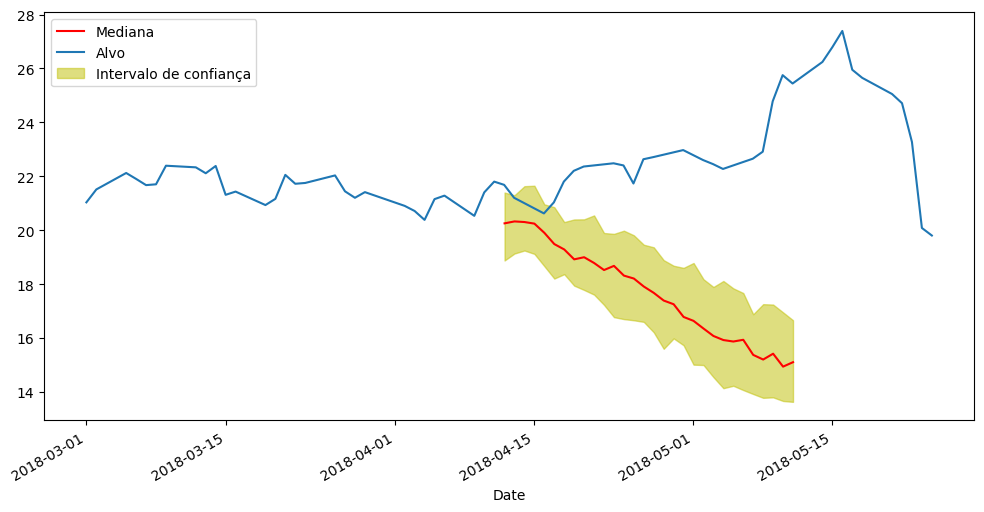

In [48]:
for k in range(len(previsoes)):
    plt.figure(figsize=(12,6))
    previsoes[k]['0.5'].plot(label = 'Mediana', color = 'red')
    #serie_temporal_teste[k].plot(label = 'Alvo')
    serie_temporal_teste[k][-prediction_length - context_length:].plot(label = 'Alvo')
    p10 = previsoes[k]['0.1']
    p90 = previsoes[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color = 'y', alpha = 0.5, label = 'Intervalo de confiança')
    plt.legend()
    plt.show()

In [49]:
df_teste = base.iloc[1315:,:]
len(df_teste)

30

In [50]:
df_teste

,Close
Date,
2018-04-13,21.200001
2018-04-16,20.620001
2018-04-17,21.030001
2018-04-18,21.799999
2018-04-19,22.200001
2018-04-20,22.360001
2018-04-23,22.480000
2018-04-24,22.400000
2018-04-25,21.730000


In [51]:
previsoes2 = previsoes[0]['0.5'].values
previsoes2

array([20.25145912, 20.32305527, 20.30036736, 20.24111557, 19.90065575,
       19.48286247, 19.28262901, 18.91594696, 18.99425697, 18.78108978,
       18.51939392, 18.67346764, 18.31280899, 18.20353508, 17.90722656,
       17.67249298, 17.38721275, 17.25017548, 16.77862549, 16.63292694,
       16.34900665, 16.07304382, 15.92151928, 15.86697578, 15.93112183,
       15.37045574, 15.19859695, 15.41491413, 14.93506527, 15.09993649])

In [52]:
esperado = df_teste['Close'].values
esperado

array([21.200001, 20.620001, 21.030001, 21.799999, 22.200001, 22.360001,
       22.48    , 22.4     , 21.73    , 22.629999, 22.709999, 22.969999,
       22.6     , 22.450001, 22.27    , 22.65    , 22.91    , 24.780001,
       25.75    , 25.440001, 26.24    , 26.790001, 27.389999, 25.950001,
       25.65    , 25.049999, 24.709999, 23.27    , 20.08    , 19.799999])

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(esperado, previsoes2)
mse = mean_squared_error(esperado, previsoes2)
print('MAE: ', mae, '\nMSE: ', mse)

MAE:  5.597935398643333 
MSE:  41.947561682242764
